<a href="https://colab.research.google.com/github/vir097/Airbnb-Bookings-Analysis---Capstone-Project/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

* **What is Airbnb?**

* ***Airbnb was founded in 2008 as a platform enabling locals to list their homes for short term rental and travelers to have a lodging option alternative to hotels.*** 
* ***Airbnb is the largest provider of rooms available to travelers.Along with homes for rent, Airbnb.com allows its users to search through “Experiences”, which include pre-arranged multi destination trips, “Restaurants,”.***

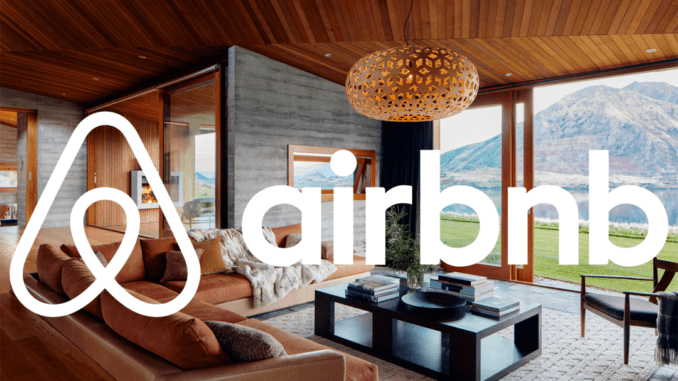

## **Import libraries and load dataset**

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
airbnb_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AirBnB Bookings Analysis/Airbnb NYC 2019.csv")

## **Basic Inspection of Data**

In [ ]:
# Top 5 rows of the dataset
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Bottom 5 rows of the dataset
airbnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
# Get the shape of the dataset
# Finding the number of rows and columns in the given dataset
airbnb_df.shape 

(48895, 16)

* **After loading the dataset in and from the head of AIRBNB_NYC_CSV_2019 dataset, we can see several things. This dataset has $16$ columns and $48896$ rows and provides a very rich amount of information for deep data exploration we can do this dataset.** 

In [ ]:
# Columns in the given dataset
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Desciption of the give dataset
airbnb_df.describe([.25, .50, .75, .95, .98, .99])

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
95%,3.525910e+07,2.417646e+08,40.825643,-73.865771,355.000000,30.000000,114.000000,4.640000,15.000000,359.000000
98%,3.598575e+07,2.623600e+08,40.851312,-73.810278,550.000000,30.000000,172.000000,6.000000,91.000000,365.000000
99%,3.623888e+07,2.677118e+08,40.864661,-73.776920,799.000000,45.000000,214.000000,7.195800,232.000000,365.000000


* **In normal situation price of the any property cannot be 0 therefore we will exclude the data having pricing 0.**

In [ ]:
df=airbnb_df.loc[airbnb_df['price']>0]
df.describe([.25, .50, .75, .95, .98, .99])

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.888400e+04,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,38833.000000,48884.000000,48884.000000
mean,1.901679e+07,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.373128,7.144628,112.779498
std,1.098432e+07,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.680391,32.956185,131.627271
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.470548e+06,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967574e+07,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915297e+07,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
95%,3.525934e+07,2.417652e+08,40.825638,-73.865755,355.000000,30.000000,114.000000,4.640000,15.000000,359.000000
98%,3.598577e+07,2.623600e+08,40.851317,-73.810256,550.000000,30.000000,172.000000,6.000000,91.000000,365.000000
99%,3.623891e+07,2.677137e+08,40.864662,-73.776903,799.000000,45.000000,214.000000,7.196800,232.000000,365.000000


* **From the above Description we get to know that there are some outliers in the dataset.**
* **Outlires present in columns:**
       price
       minimum_nights
       number_of_reviews
       reviews_per_month

In [ ]:
# Check the type of data present in DataFrame
airbnb_df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

**lets check for NaN values in Dataset**

In [ ]:
#drop unnecessary Columns
airbnb_df.drop(['id','last_review'], axis=1, inplace=True)

In [ ]:
# lets find the number of NaN values in each column
airbnb_df.isnull().sum()

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# First and foremost, I'd like to determine which columns contain NaN values.

NaN_value_columns = [i for i in airbnb_df.columns if airbnb_df[i].isnull().any()]
print(f'NaN value columns are: {NaN_value_columns}')

NaN value columns are: ['name', 'host_name', 'reviews_per_month']


* **There are 3 columns in the dataset which contain NaN values.**
* **NaN value columns:**
      name
      host_name  
      reviews_per_month

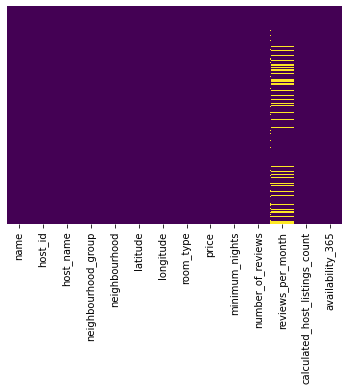

In [ ]:
# Visualization of null values 
sns.heatmap(airbnb_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

*  **The *reviews per month* column contain 10052 NaN values.** 

**Handling the NaN values**

In [ ]:
''' The NaN values can be imputed by 
the aggregate (mean or median) of the remaining values 
in the reviews per month column. '''

mean_ = round(airbnb_df[~airbnb_df['reviews_per_month'].isnull()]['reviews_per_month'].mean(),1)

median_ = airbnb_df[~airbnb_df['reviews_per_month'].isnull()]['reviews_per_month'].median()

[mean_, median_]

[1.4, 0.72]

In [ ]:
airbnb_df['reviews_per_month']

0        0.21
1        0.38
2         NaN
3        4.64
4        0.10
         ... 
48890     NaN
48891     NaN
48892     NaN
48893     NaN
48894     NaN
Name: reviews_per_month, Length: 48895, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


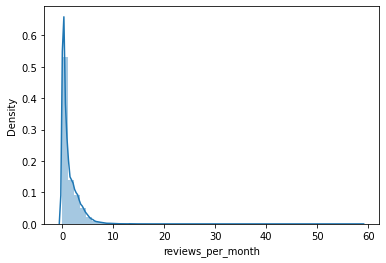

In [ ]:
# Distplot
sns.distplot(airbnb_df['reviews_per_month'])

* **As we can see, there were some outliers in the reviews per month column, which affects our mean because the mean is highly biased toward the outliers.**
* **Hence we will replace the NaN values in the reviews_per_month column with its median.** 

In [ ]:
# Handilng NaN values from Review per month column
airbnb_df['reviews_per_month'].fillna(value= mean_ , inplace=True)

In [ ]:
# Handilng NaN values from Name and host_name column
airbnb_df['name'].fillna(value ='No name', inplace=True)
airbnb_df['host_name'].fillna(value ='No name', inplace=True)

In [ ]:
airbnb_df.isnull().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

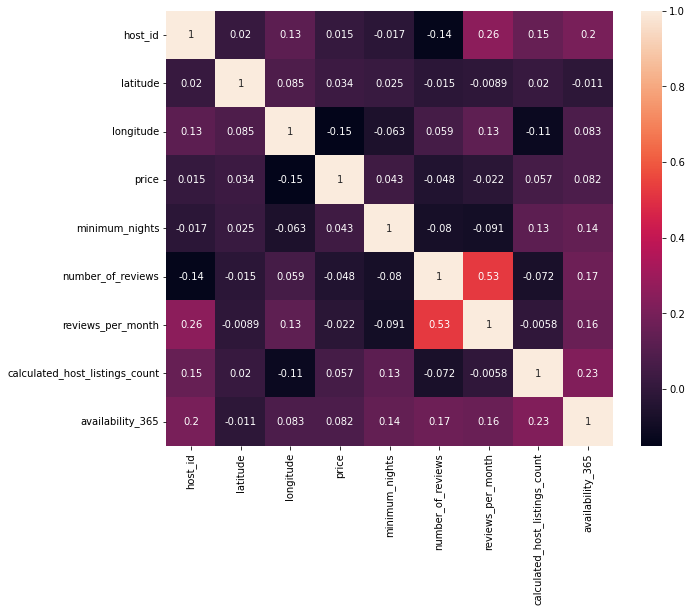

In [ ]:
# Get the pairwise correlation of all columns in the dataframe.
corrMatrix = airbnb_df.corr()

# Get a Visual Representation of the Correlation Matrix using Seaborn and Matplotlib.
plt.figure(figsize =(10,8))
sns.heatmap(corrMatrix, annot=True)
plt.show()

# **Exploratary Data Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


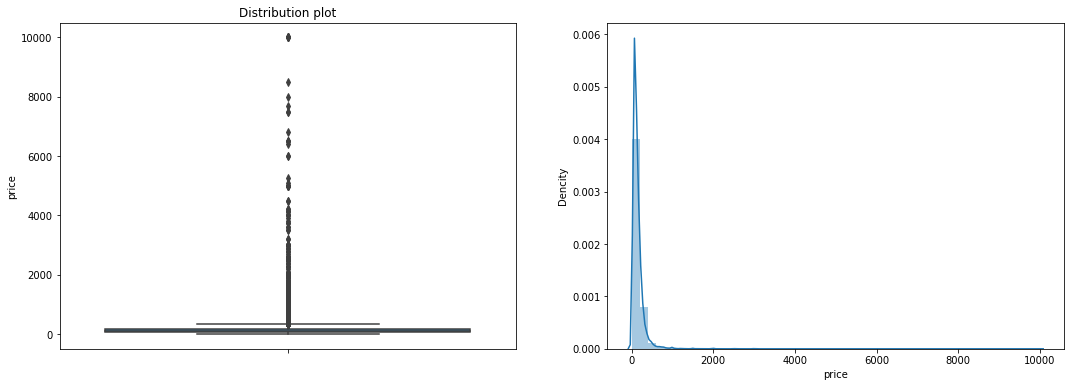

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


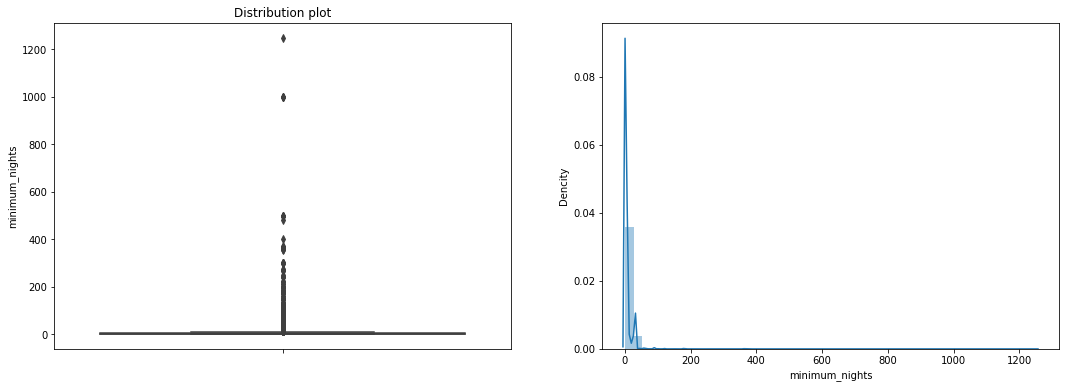

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


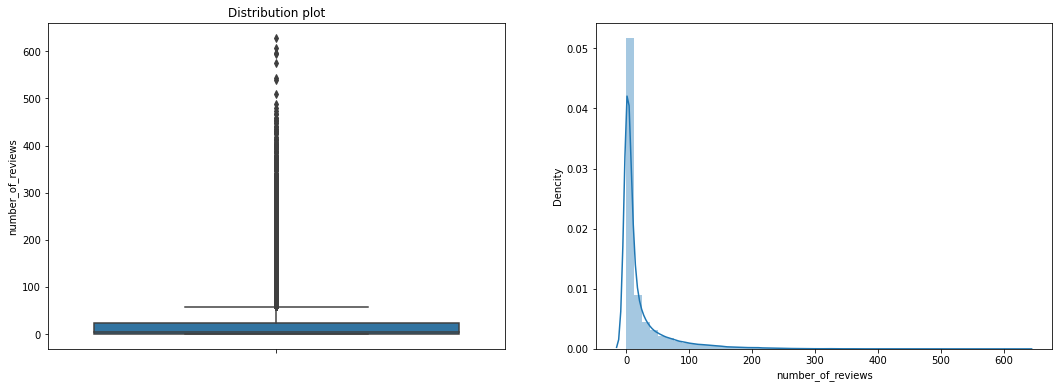

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


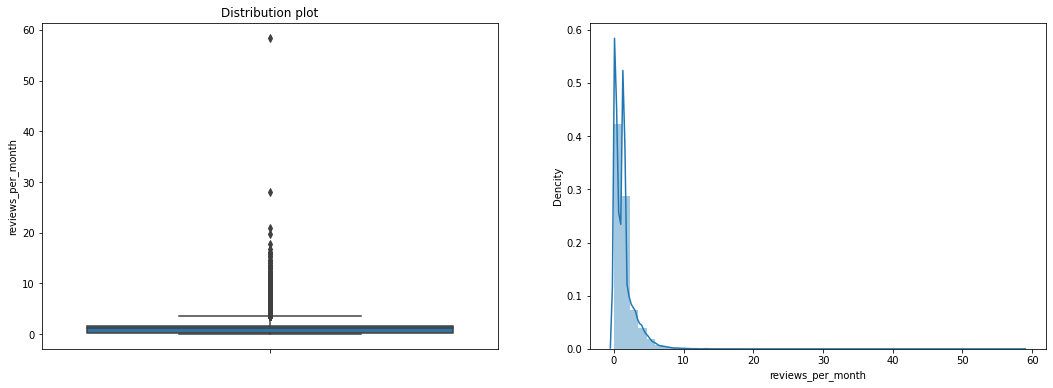

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


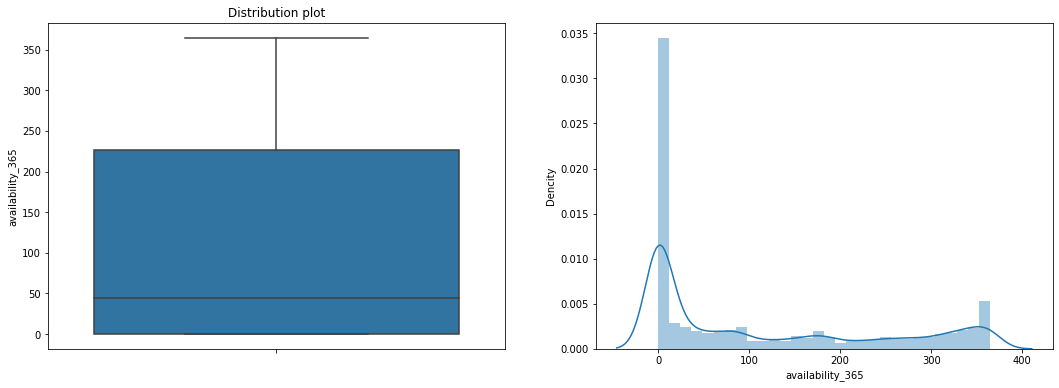

In [ ]:
''' visualising distribution of price, minimum nights, number of reviews, 
reviews per month, availability using Distplot'''
variables = ['price','minimum_nights', 'number_of_reviews', 'reviews_per_month','availability_365']
for var in variables:
    plt.figure(figsize=(18,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=airbnb_df[var])
    fig.set_title('Distribution plot')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(airbnb_df[var].dropna())
    fig.set_ylabel('Dencity')
    fig.set_xlabel(var)

    plt.show()

* **The above distributions are right skewed due to presence of outliers.**

## **How many different type of rooms listed on airbnb platform?**

In [ ]:
# our next task is to get unique value of some specifice columns to know about their different types.

# Get unique value of room type to know about different types of room listed on Airbnb platform.
# code
Different_type_of_rooms = airbnb_df['room_type'].unique()
print("Different type of rooms listed on Airbnb platform:", Different_type_of_rooms)

Different type of rooms listed on Airbnb platform: ['Private room' 'Entire home/apt' 'Shared room']


* **As we can see that there are three type of rooms listed on airbnb:**
      Private room
      Entire home/apt
      Shared room

## **Understanding Different Areas in which Airbnb service exist**

In [ ]:
# Examine unique neighbourhood group(boroughs)
airbnb_df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

* **Airbnb service is available in five different neighbourhood group(boroughs)**
1. Brooklyn
2. Manhattan
3. Queens
4. Staten Island
5. Bronx

In [ ]:
# Examine unique neighbourhood.
airbnb_df['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [ ]:
# Get count of unique neighbourhood
len(airbnb_df['neighbourhood'].unique())

221

* **Now, we know that there are $221$ areas have the Airbnb listing**.

In [ ]:
# Performing Groupby operation to get list of nieghbourhood w.r.t. their neighbourhood group
neighbourhood_df =airbnb_df[['neighbourhood_group','neighbourhood']].groupby(['neighbourhood_group', 'neighbourhood'], as_index=False).first()
neighbourhood_df

,neighbourhood_group,neighbourhood
0,Bronx,Allerton
1,Bronx,Baychester
2,Bronx,Belmont
3,Bronx,Bronxdale
4,Bronx,Castle Hill
...,...,...
216,Staten Island,Tottenville
217,Staten Island,West Brighton
218,Staten Island,Westerleigh
219,Staten Island,Willowbrook


In [ ]:
# List of Bronx neighborhoods
Bronx_list = neighbourhood_df[neighbourhood_df['neighbourhood_group']== 'Bronx']
Bronx_list.head()

,neighbourhood_group,neighbourhood
0,Bronx,Allerton
1,Bronx,Baychester
2,Bronx,Belmont
3,Bronx,Bronxdale
4,Bronx,Castle Hill


In [ ]:
print("Total neighborhoods of Bronx:", len(Bronx_list))

Total neighborhoods of Bronx: 48


In [ ]:
# List of Manhattan neighborhoods
Manhattan_list = neighbourhood_df[neighbourhood_df['neighbourhood_group']== 'Manhattan']
Manhattan_list.head()

,neighbourhood_group,neighbourhood
95,Manhattan,Battery Park City
96,Manhattan,Chelsea
97,Manhattan,Chinatown
98,Manhattan,Civic Center
99,Manhattan,East Harlem


In [ ]:
print("Total neighborhoods of Manhattan:", len(Manhattan_list))

Total neighborhoods of Manhattan: 32


In [ ]:
# List of Queens neighborhoods
Queens_list = neighbourhood_df[neighbourhood_df['neighbourhood_group']== 'Queens']
Queens_list.head()

,neighbourhood_group,neighbourhood
127,Queens,Arverne
128,Queens,Astoria
129,Queens,Bay Terrace
130,Queens,Bayside
131,Queens,Bayswater


In [ ]:
print("Total neighborhoods of Queens:", len(Queens_list))

Total neighborhoods of Queens: 51


In [ ]:
# List of Brooklyn neighborhoods
Brooklyn_list=neighbourhood_df[neighbourhood_df['neighbourhood_group']== 'Brooklyn']
Brooklyn_list.head()

,neighbourhood_group,neighbourhood
48,Brooklyn,Bath Beach
49,Brooklyn,Bay Ridge
50,Brooklyn,Bedford-Stuyvesant
51,Brooklyn,Bensonhurst
52,Brooklyn,Bergen Beach


In [ ]:
print("Total neighborhoods of Brooklyn:", len(Brooklyn_list))

Total neighborhoods of Brooklyn: 47


In [ ]:
# List of Staten Island neighborhoods
staten_island_list =neighbourhood_df[neighbourhood_df['neighbourhood_group']== 'Staten Island']
staten_island_list.head()

,neighbourhood_group,neighbourhood
178,Staten Island,Arden Heights
179,Staten Island,Arrochar
180,Staten Island,"Bay Terrace, Staten Island"
181,Staten Island,Bull's Head
182,Staten Island,Castleton Corners


In [ ]:
print("Total neighborhoods of Staten Island:", len(staten_island_list))

Total neighborhoods of Staten Island: 43


In [ ]:
# count of unique neighborhoods w.r.t their neighbourhood group
neighbourhood_df.neighbourhood_group.value_counts()

Queens           51
Bronx            48
Brooklyn         47
Staten Island    43
Manhattan        32
Name: neighbourhood_group, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


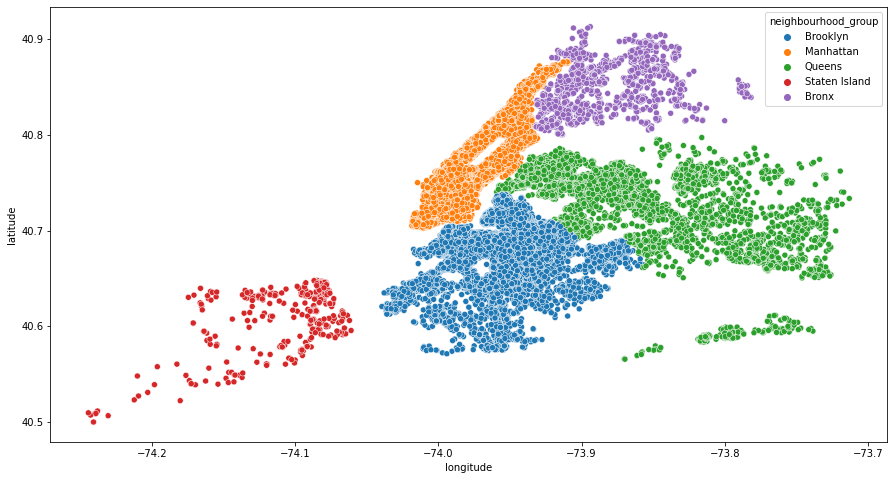

In [ ]:
# Map of neighbourhood_group

#initialing the figure size
plt.rcParams['figure.figsize']=(15,8)

sns.scatterplot(airbnb_df.longitude,airbnb_df.latitude,hue=airbnb_df.neighbourhood_group)
plt.ioff()

## **From which neighbourhood group, most rooms are listed on Airbnb platform.**

In [ ]:
airbnb_df.groupby(['neighbourhood_group'])['room_type'].value_counts().unstack()

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


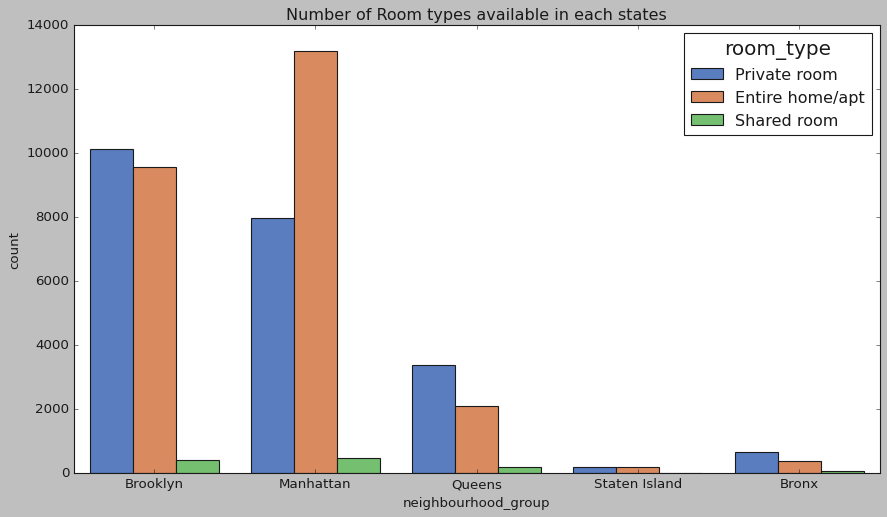

In [ ]:
# Countplot
# Visualisation of count of different room type listed on Airbnb according to neighbourhood group
sns.set_theme(style="white", context="talk")
sns.set_style('whitegrid')
plt.style.use('classic')
plt.rcParams['figure.figsize']=(13,7)

plt.title("Number of Room types available in each states")
sns.countplot(airbnb_df.neighbourhood_group,hue=airbnb_df.room_type, palette="muted")
plt.show()

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

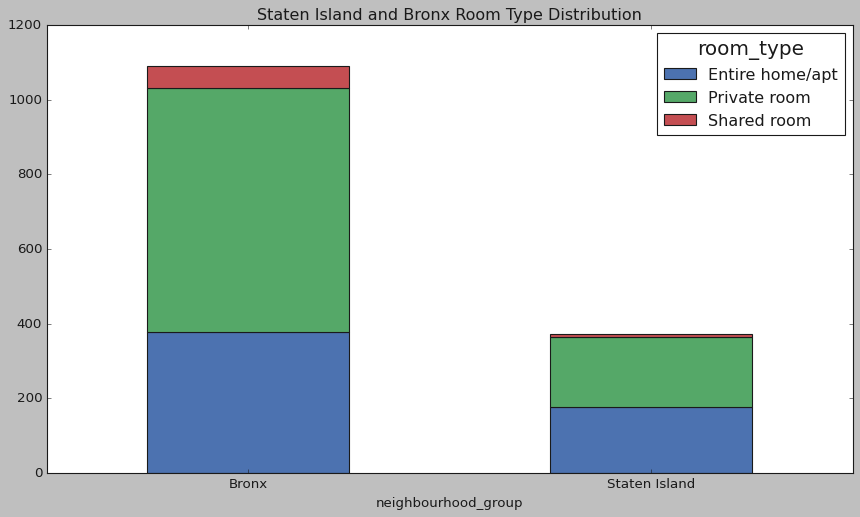

In [ ]:
# Individual analysis of Staten Island and Bronx (since above plot doesnot give a readable number)
new_data_frame=airbnb_df.groupby(['neighbourhood_group'])['room_type'].value_counts().unstack()
new_data_frame.iloc[0:5:4].plot(kind='bar', stacked=True)
plt.title('Staten Island and Bronx Room Type Distribution')
plt.xticks(rotation=360, ha='center')

* **Most of the rooms were listed from $Brooklyn$ and $Manhattan$ locations.**
* **$Manhattan$ has the most number of entire apartment and shared accommodations.**
* **$Brooklyn$ has the most number of private rooms.**

## **Which type of the room was most preferred by the people?** 

In [ ]:
# let's find out count of each type of rooms offered
room_count = airbnb_df['room_type'].value_counts()
print(room_count) 

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

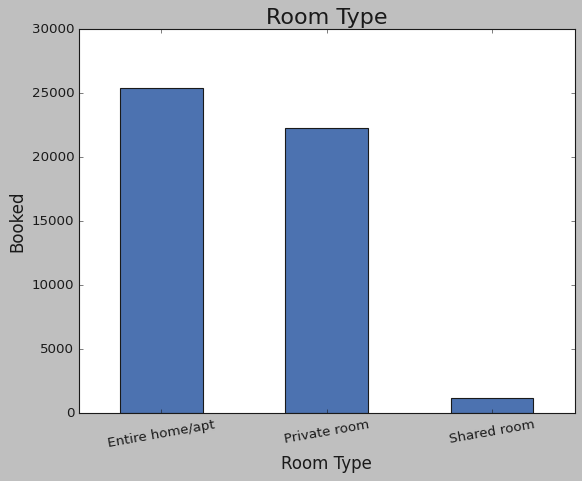

In [ ]:
# Visualization of rooms type listed on airbnb platform through Bar graph
# Bar Graph
sns.set_theme(style="white", context="talk")
sns.set_style('whitegrid')
plt.style.use('classic')

plt.rcParams["figure.figsize"] = (8,6)
room_count.plot(kind='bar')
plt.xlabel('Room Type',fontsize=15)
plt.ylabel('Booked',fontsize=15)
plt.title('Room Type',fontsize=20)
plt.xticks(rotation=10)

* **We can see that the $Entire$ $Home/Apt$ was the highest preference of people, followed by the $Private$ $Room$, and the least preferred was $Shared$ $Room$.**

## **Which type of room is expensive to stay?**

In [ ]:
# Get median price for each room type listed on Airbnb platform.
median_price = airbnb_df.groupby('room_type')['price'].median().reset_index().rename(columns={'price':'median price'})


# Get mean price for each room type listed on Airbnb platform.
mean_price = airbnb_df.groupby('room_type')['price'].mean().reset_index().rename(columns={'price':'mean price'})


# Get data of mean and median price for each room type listed on Airbnb platform.
price_df = pd.merge(median_price, mean_price,on='room_type')
price_df

,room_type,median price,mean price
0,Entire home/apt,160.0,211.794246
1,Private room,70.0,89.780973
2,Shared room,45.0,70.127586


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

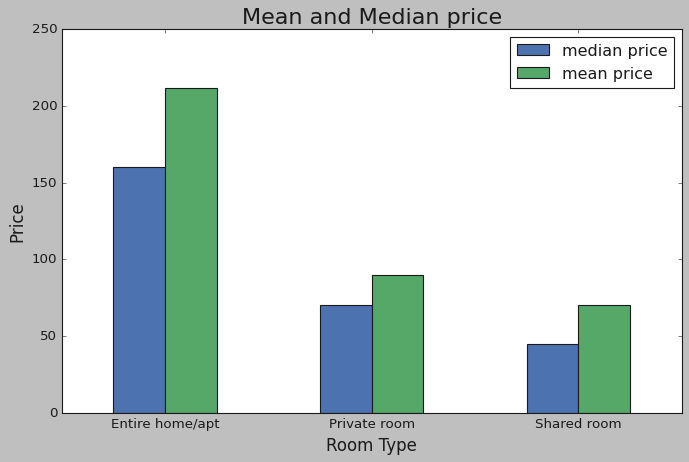

In [ ]:
# Get a Visual Representation of mean and median price for each room type listed on Airbnb platform.
# code
#initialing the figure size
plt.rcParams["figure.figsize"] = (10,6)

price_df.plot.bar(x='room_type')
plt.title('Mean and Median price', fontsize = 20)
plt.ylabel('Price',fontsize =15)
plt.xlabel('Room Type', fontsize =15)
plt.xticks(rotation=0)

* **We can conclude that the Entire home/apt has an average reservation price was around 211.79 $, which was the most expensive of all types of rooms.**

* **Private room type is the second most expensive.**

* **A shared room is the least expensive.**

## **Check the Availability**

### **Availability of rooms at different price range.**

In [ ]:
# airbnb_df[airbnb_df.price<=60].shape
# airbnb_df[airbnb_df.price<=120].shape
# airbnb_df[airbnb_df.price<=180].shape
# airbnb_df[airbnb_df.price<=240].shape
# airbnb_df[airbnb_df.price<=300].shape
# airbnb_df[airbnb_df.price<=500].shape


data_table = pd.DataFrame({'Price range':['price<=60','60<price<=120','120<price<=180','180<price<=240','240<price<=300','300<price<=500','price>500'],
                           'Total room available':[10063,17490,9902,4917,3166,2313,1044]})
data_table

,Price range,Total room available
0,price<=60,10063
1,60<price<=120,17490
2,120<price<=180,9902
3,180<price<=240,4917
4,240<price<=300,3166
5,300<price<=500,2313
6,price>500,1044


* **From the above observation, we can see most of the rooms available at a price range of $10$ to $180$.** 
* **Less number of rooms available at a price range greater than $>500$ which is $1044$.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


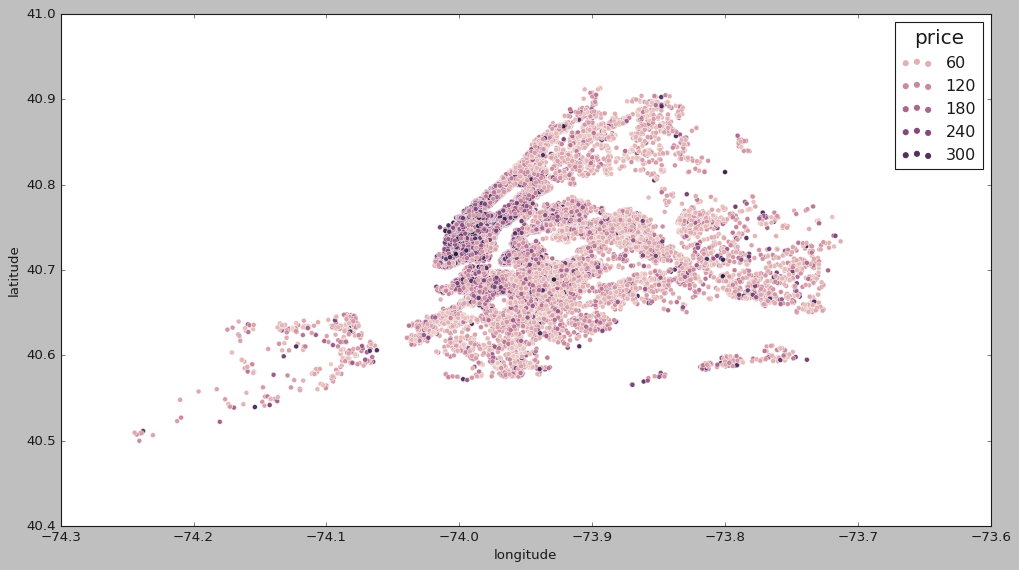

In [ ]:
#Visualisation of price distribution
#code
airbnb_2 = airbnb_df.loc[(airbnb_df['price']>0)& (airbnb_df.price < 350)]

#initialing the figure size
plt.rcParams['figure.figsize']=(15,8)
sns.scatterplot(airbnb_2.longitude,airbnb_2.latitude,hue=airbnb_2.price )
plt.ioff()

### **Availability at different neighborhoods(location)**

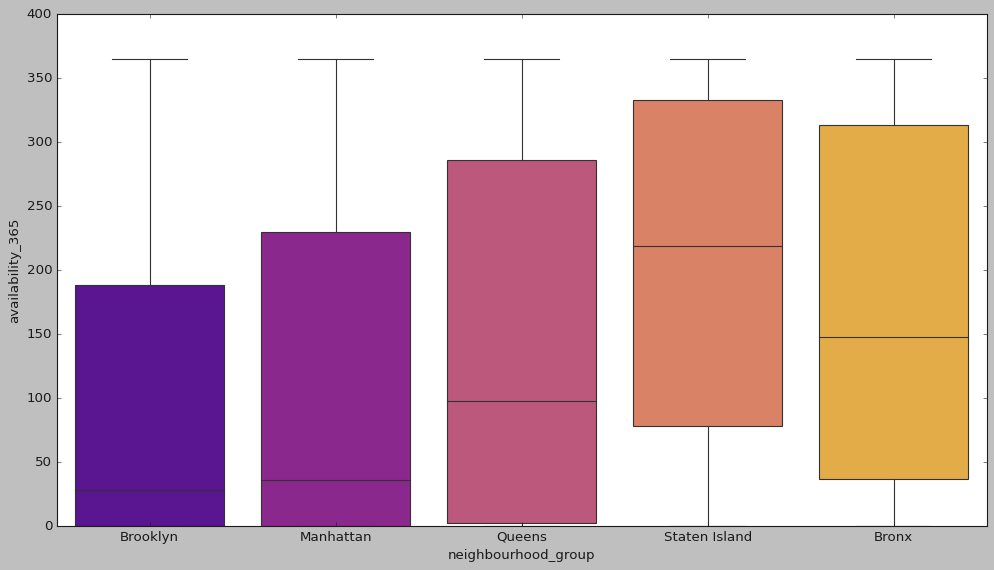

In [ ]:
# Visualisation of availability according to different location.

plt.figure(figsize=(15,8))
sns.boxplot(data=airbnb_df,x='neighbourhood_group',y='availability_365',palette='plasma')

* **$Staten$ $Island$ has the properties with the highest availability and $Brooklyn$ has the properties with the least availability.**

In [ ]:
availability_rooms =pd.DataFrame({'availability 365':['>=80','>=160','>=240','>=320','<320'],'available rooms':[9955,5255,4501,5039,6541]})
availability_rooms

,availability 365,available rooms
0,>=80,9955
1,>=160,5255
2,>=240,4501
3,>=320,5039
4,<320,6541


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


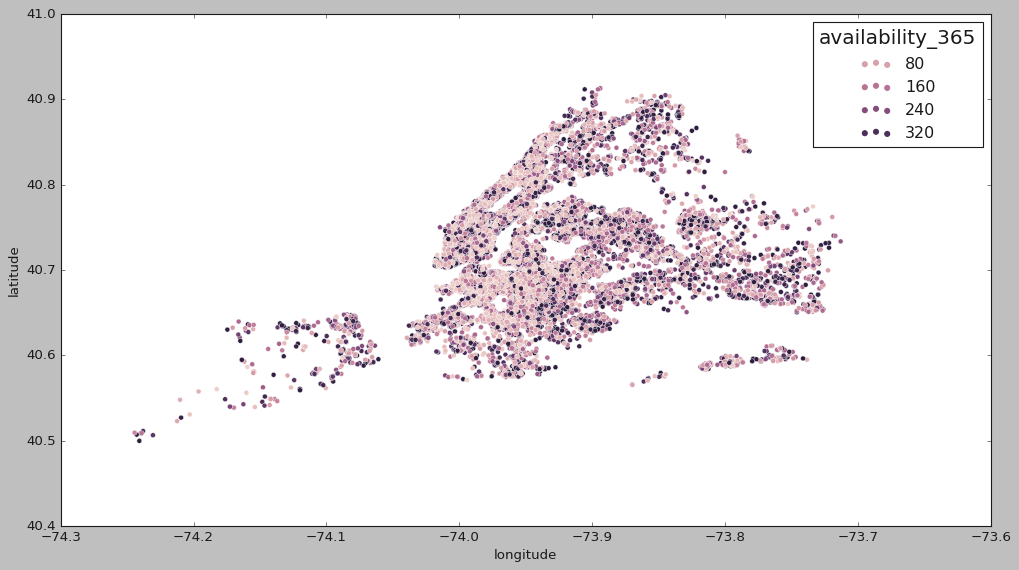

In [ ]:
# Availability of Room

#code
plt.rcParams['figure.figsize']=(15,8)
airbnb_df_3=airbnb_df[airbnb_df.availability_365>0]
sns.scatterplot(airbnb_df.longitude,airbnb_df.latitude,hue=airbnb_df_3.availability_365)
plt.ioff()

## **The most expensive neighborhoods to book on airbnb**

**The 10 most expensive neighborhoods to book on airbnb.**

In [ ]:
# Calculating Mean Price of the neighbourhood values.
df = airbnb_df.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index().rename(columns={'price':'average price'})
top_10=df.sort_values('average price', ascending=False).head(10)
top_10.reset_index(inplace=True)
top_10.drop('index',axis=1)

,neighbourhood_group,neighbourhood,average price
0,Staten Island,Fort Wadsworth,800.000000
1,Staten Island,Woodrow,700.000000
2,Manhattan,Tribeca,490.638418
3,Brooklyn,Sea Gate,487.857143
4,Bronx,Riverdale,442.090909
5,Staten Island,Prince's Bay,409.500000
6,Manhattan,Battery Park City,367.557143
7,Manhattan,Flatiron District,341.925000
8,Staten Island,Randall Manor,336.000000
9,Manhattan,NoHo,295.717949


**The 10 cheapest neighborhoods to book on airbnb.**

In [ ]:
cheapest=df.sort_values('average price', ascending=False).tail(10)
cheapest.reset_index(inplace=True)
cheapest.drop('index',axis=1)

,neighbourhood_group,neighbourhood,average price
0,Bronx,Mount Eden,58.500000
1,Staten Island,Concord,58.192308
2,Staten Island,Grant City,57.666667
3,Staten Island,New Dorp Beach,57.400000
4,Bronx,Bronxdale,57.105263
5,Staten Island,New Dorp,57.000000
6,Bronx,Soundview,53.466667
7,Bronx,Tremont,51.545455
8,Bronx,Hunts Point,50.500000
9,Staten Island,Bull's Head,47.333333


**price vs neighbourhood_group**

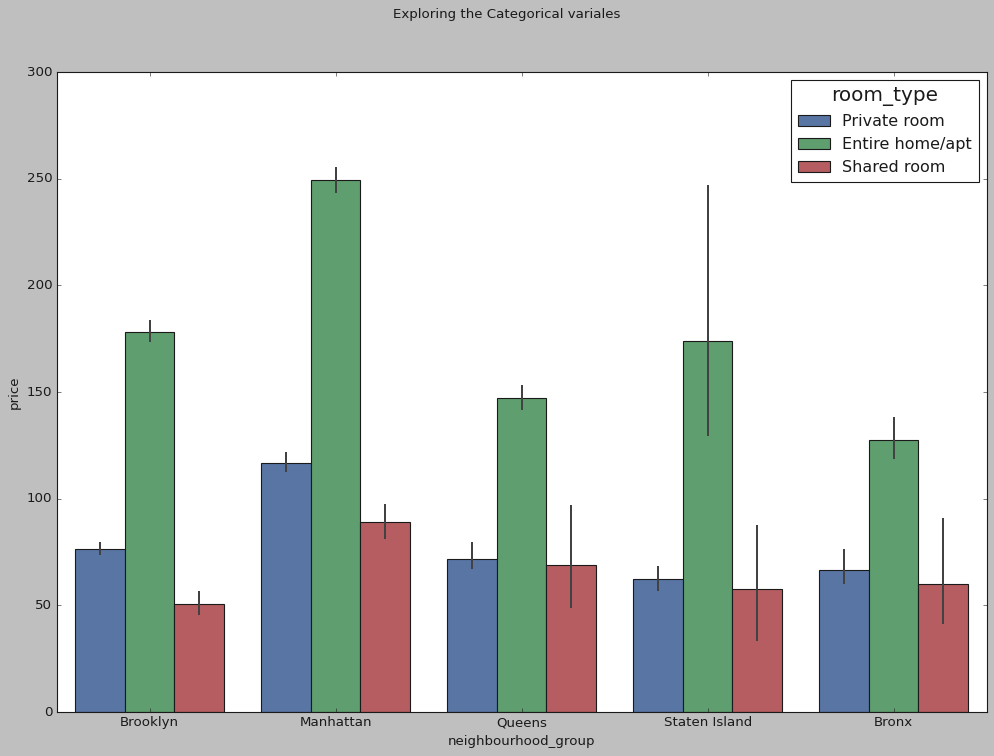

In [ ]:
# price vs neighbourhood_group
fig= plt.figure(figsize=(15,10))
fig.suptitle("Exploring the Categorical variales")
sns.barplot(x=airbnb_df['neighbourhood_group'],y=airbnb_df['price'],hue=airbnb_df['room_type'])
fig.show() 

## **Is there any noticeable difference of traffic among different areas and what could be the reason for it?**

**Which location covers maximum listings?**

In [ ]:
airbnb_df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

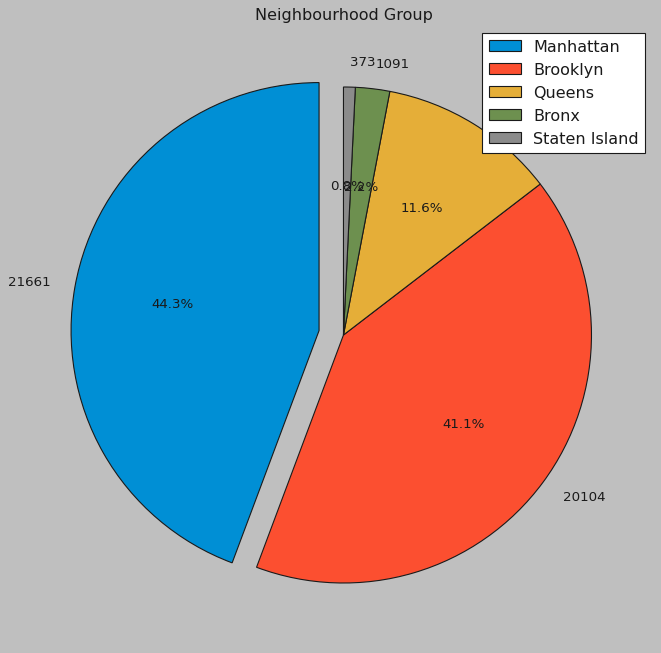

In [ ]:

# Visualisation of Airbnb listings in different neighbourhood groups (in percentage).
# pie chart

labels = airbnb_df.neighbourhood_group.value_counts().index

colors = ['#008fd5','#fc4f30','#e5ae38','#6d904f','#8b8b8b']
explode = (0.1,0,0,0,0)

shape = airbnb_df.neighbourhood_group.value_counts().values


plt.rcParams["figure.figsize"]=(10,10)

plt.pie(shape, explode = explode, labels=shape, colors= colors, autopct = '%1.1f%%', startangle=90)
plt.legend(labels)
plt.title('Neighbourhood Group')
plt.show()

In [ ]:
# Visualisation of Area which has most number of listings.

#code
area = airbnb_df.neighbourhood.value_counts().head(10)
area_df = pd.DataFrame(area)
area_df.reset_index(inplace=True)
area_df.rename(columns={'index':'neighbourhood','neighbourhood':'count'},inplace=True)
area_df


,neighbourhood,count
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971
5,Hell's Kitchen,1958
6,East Village,1853
7,Upper East Side,1798
8,Crown Heights,1564
9,Midtown,1545


* **Top $10$ prime locations where people stay longer.**

* **Williamsburg has the highest number of listings. We also found that 5 out of the top 10 areas were in Manhattan and the other 5 in Brooklyn.**

* **As we can see from the above observation most traffic is generated in Manhattan and Brooklyn.**

* **One of the reasons could be that Manhattan and Brooklyn had the most listings, covering more than 80% of the total listings.**

In [ ]:
airbnb_df.groupby('neighbourhood_group')['room_type'].value_counts().unstack()

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

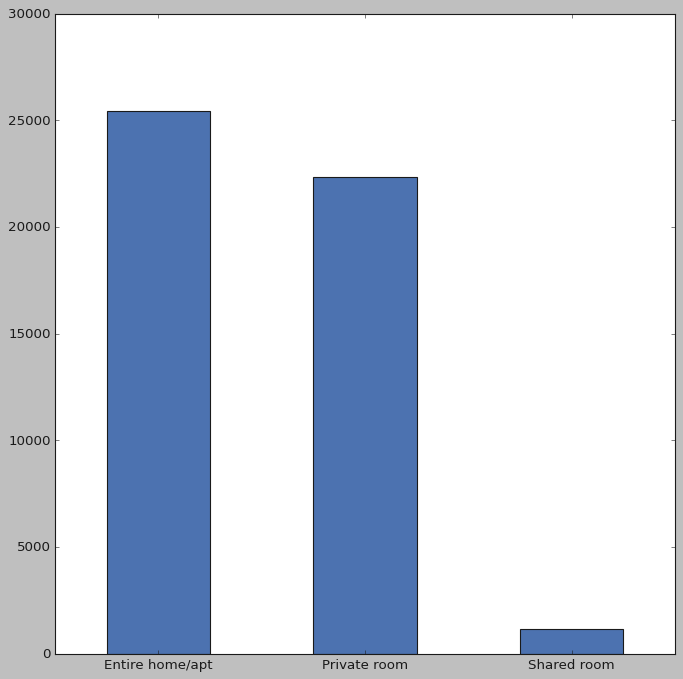

In [ ]:
# Most preferred room type
l=airbnb_df.room_type.value_counts()
l.plot(kind='bar')
plt.xticks(rotation=0)

* **$Manhattan$ and $Brookly$ have the most $Private$ $rooms$ and $Entire$ $home/apt$ ( the most preferred type of rooms by people),  which could be the second reason for most traffic-generated in this area.**

## **Which host is the busiest and why?**

In [ ]:
# Examine which hosts ID is the most listed on Airbnb platform
# code
top_host = airbnb_df.groupby(['host_name','host_id'])['host_id'].count().sort_values(ascending=False)

# Creating Data Frame of top_host_IDs
top_host_df = pd.DataFrame(top_host)
#.sort_values(ascending=False)

# Rename the columns of the Data Frame
top_host_df.rename(columns={'host_id':'total listings'}, inplace=True)

top_host_df.head(10)

,,total listings
host_name,host_id,
Sonder (NYC),219517861,327
Blueground,107434423,232
Kara,30283594,121
Kazuya,137358866,103
Jeremy & Laura,16098958,96
Sonder,12243051,96
Corporate Housing,61391963,91
Ken,22541573,87
Pranjal,200380610,65


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

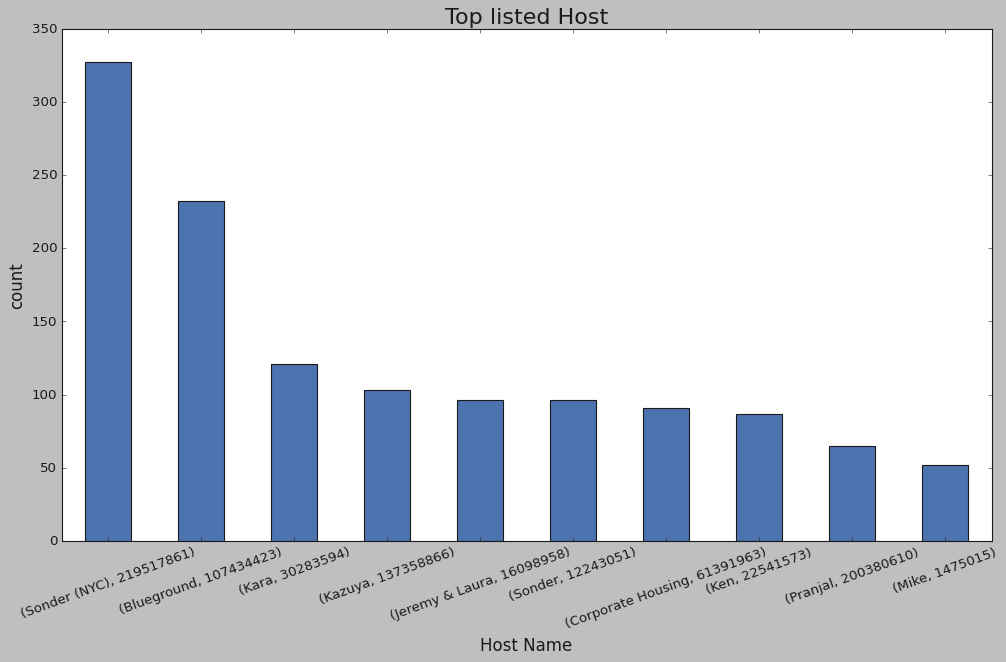

In [ ]:
top_10_host = top_host.head(10)
plt.figure(figsize=(15,8))
top_10_host.plot(x="host_name",y="count", kind='bar')
plt.xlabel('Host Name',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.title('Top listed Host',fontsize=20)
plt.xticks(rotation=20)

* **We got the top ten listed Hosts. From the above graph, we can see that the top host (Host_ID = 219517861 ) has 327 listings which was the maximum number of listings on the Airbnb platform and taking advantage of this service.**

### **Now, examine the top 3 hosts which have the most number property listed on the Airbnb platform.**
* Factors that we are going to assume to check for the busiest host.
  1. The number of properties listed on the Airbnb platform.
  2. The number of days the property was available.
  3. Based on the average monthly review of that property.



#### **Host:  Sonder (NYC)**

In [ ]:
# check most listed room by host Sonder (NYC)
airbnb_df.groupby(airbnb_df['host_name']=='Sonder (NYC)')['room_type'].value_counts().unstack()

room_type,Entire home/apt,Private room,Shared room
host_name,,,
False,25090.0,22318.0,1160.0
True,319.0,8.0,NaN


In [ ]:
# neighbourhood group
airbnb_df.groupby(airbnb_df['host_name']=='Sonder (NYC)')['neighbourhood_group'].value_counts().unstack()

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
host_name,,,,,
False,1091.0,20104.0,21334.0,5666.0,373.0
True,NaN,NaN,327.0,NaN,NaN


In [ ]:
# review per month 
airbnb_df.groupby(airbnb_df['host_name']=='Sonder (NYC)')['reviews_per_month'].mean()

host_name
False    1.376365
True     1.729541
Name: reviews_per_month, dtype: float64

In [ ]:
# Availability 
airbnb_df.groupby(airbnb_df['host_name']=='Sonder (NYC)')['availability_365'].mean()

host_name
False    111.510768
True     301.492355
Name: availability_365, dtype: float64

#### **Host: Blueground**

In [ ]:
# check most listed room by host Blueground
airbnb_df.groupby(airbnb_df['host_name']=='Blueground')['room_type'].value_counts().unstack()

room_type,Entire home/apt,Private room,Shared room
host_name,,,
False,25177.0,22326.0,1160.0
True,232.0,NaN,NaN


In [ ]:
# neighbourhood group 
airbnb_df.groupby(airbnb_df['host_name']=='Blueground')['neighbourhood_group'].value_counts().unstack()

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
host_name,,,,,
False,1091.0,20102.0,21431.0,5666.0,373.0
True,NaN,2.0,230.0,NaN,NaN


In [ ]:
# review per month 
airbnb_df.groupby(airbnb_df['host_name']=='Blueground')['reviews_per_month'].mean()

host_name
False    1.379307
True     1.257069
Name: reviews_per_month, dtype: float64

In [ ]:
# Availability 
airbnb_df.groupby(airbnb_df['host_name']=='Blueground')['availability_365'].mean()

host_name
False    112.108974
True     253.810345
Name: availability_365, dtype: float64

#### **Host: Kara**

In [ ]:
# check most listed room by host Kara
airbnb_df.groupby(airbnb_df['host_name']=='Kara')['room_type'].value_counts().unstack()

room_type,Entire home/apt,Private room,Shared room
host_name,,,
False,25275.0,22317.0,1160.0
True,134.0,9.0,NaN


In [ ]:
# neighbourhood group
airbnb_df.groupby(airbnb_df['host_name']=='Kara')['neighbourhood_group'].value_counts().unstack()

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
host_name,,,,,
False,1091.0,20098.0,21526.0,5664.0,373.0
True,NaN,6.0,135.0,2.0,NaN


In [ ]:
# review per month 
airbnb_df.groupby(airbnb_df['host_name']=='Kara')['reviews_per_month'].mean()

host_name
False    1.380055
True     0.926014
Name: reviews_per_month, dtype: float64

In [ ]:
# Availability 
airbnb_df.groupby(airbnb_df['host_name']=='Kara')['availability_365'].mean()

host_name
False    112.306572
True     274.636364
Name: availability_365, dtype: float64

* **Host  $Sonder (NYC)$ have a total of $327$ listed rooms out of that $319$ are $Entire$ $home/apt$ (which is the most preferred type of room by people) and only $9$ $private$ $rooms$.**  

*  **All the rooms are listed in $Manhattan$ (which is the most traffic-generating neighbourhood group).**
  
*  **Availability of property listed by the host $Sonder$ was $+300$ days.**

Hence, we can say that Sonder is the busiest host.

# **Conclusion:**

* **Simply by performing EDA on the dataset, we have identified various new insights into how Airbnb listings are distributed, how the price range varies according to location, and we know where the listings are located.** 

* **There were three types of the room onto which the majority of people preferred the Private room or the Entire home/apartment.$.**

* **I found out that $Manhattan$ and $Brooklyn$ are dominating ($Prime$ $locations$) locations.**

* **The price of accommodation in Manhattan was pretty higher and affordable for high−class people.
$Sonder$ (NYC) (Host_ID = 219517861) is the busiest host on the Airbnb platform.**

* **$Manhattan$ and $Brooklyn$ had the most listings, covering more than $80$% of the total listings.**
 
* **$Staten$ $Island$ has the properties with the highest availability and Brooklyn has the properties with the least availability.**

* **$Manhattan$ and $Brooklyn$ are the most traffic generating locations.** 